# Exemplo de Uso de Newton-Raphson Dinâmica de Máquinas

Frederico Furst Bittencourt

2022/set/07 - Engenharia Mecânica e Aeronáutica - FUMEC

## Introdução

### Definições de Símbolos e Valores

In [1]:
import sympy as sy
import numpy as np

In [2]:
theta2, theta3, theta4 = sy.symbols('theta2 theta3 theta4',real=True)

In [3]:
rho1, rho2, rho3, rho4 = sy.symbols('rho1 rho2 rho3 rho4',real=True)

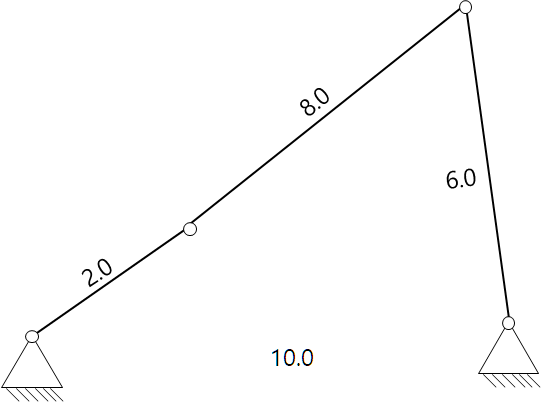

Fig, 1 - Mecanismo de Quatro Barras.

Por conta dos quatro corpos formarem um ciclo fechado, podemos escrever números complexos referentes a um plano de Argand-Gauss com origem em $O_2$.

In [4]:
eq = sy.Eq(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3),rho1+rho4*sy.exp(sy.I*theta4))
eq

Eq(rho2*exp(I*theta2) + rho3*exp(I*theta3), rho1 + rho4*exp(I*theta4))

Substituindo os comprimentos.

In [5]:
eqsubs = eq.subs({
    theta2:0.0,
    rho1:10.0,
    rho2:2.0,
    rho3:8.0,
    rho4:6.0,})
eqsubs

Eq(8.0*exp(I*theta3) + 2.0, 6.0*exp(I*theta4) + 10.0)

## Resolução Iterativa

In [6]:
sy.solve(eqsubs,theta3)

[(3.14159265358979 - asin(0.75*sin(theta4)),), (asin(0.75*sin(theta4)),)]

In [7]:
[ i[0].subs({theta4:1.93}) for i in sy.solve(eqsubs,theta3) ]

[2.36320426609408, 0.778388387495713]

In [8]:
sy.solve(eqsubs,theta4)

[(3.14159265358979 - asin(1.33333333333333*sin(theta3)),),
 (asin(1.33333333333333*sin(theta3)),)]

In [9]:
sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)-rho1-rho4*sy.exp(sy.I*theta4))

-rho1 + rho2*cos(theta2) + rho3*cos(theta3) - rho4*cos(theta4)

In [10]:
sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)-rho1-rho4*sy.exp(sy.I*theta4))

rho2*sin(theta2) + rho3*sin(theta3) - rho4*sin(theta4)

In [11]:
f1 = sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)-rho1-rho4*sy.exp(sy.I*theta4)).subs({
    theta2:0.0,
    rho1:10.0,
    rho2:2.0,
    rho3:8.0,
    rho4:6.0,})
f2 = sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)-rho1-rho4*sy.exp(sy.I*theta4)).subs({
    theta2:0.0,
    rho1:10.0,
    rho2:2.0,
    rho3:8.0,
    rho4:6.0,})

In [12]:
df13 = f1.diff(theta3)
df14 = f1.diff(theta4)
df23 = f2.diff(theta3)
df24 = f2.diff(theta4)

In [13]:
df13

-8.0*sin(theta3)

In [14]:
df14

6.0*sin(theta4)

In [15]:
df23

8.0*cos(theta3)

In [16]:
df24

-6.0*cos(theta4)

In [17]:
J = sy.Matrix([
    [ df13, df14, ],
    [ df23, df24, ],
])
Jinv = J.inv()

In [18]:
J

Matrix([
[-8.0*sin(theta3),  6.0*sin(theta4)],
[ 8.0*cos(theta3), -6.0*cos(theta4)]])

In [19]:
Jinv

Matrix([
[            -0.125*cos(theta4)/(1.0*sin(theta3)*cos(theta4) - 1.0*sin(theta4)*cos(theta3)),             -0.125*sin(theta4)/(1.0*sin(theta3)*cos(theta4) - 1.0*sin(theta4)*cos(theta3))],
[-0.166666666666667*cos(theta3)/(1.0*sin(theta3)*cos(theta4) - 1.0*sin(theta4)*cos(theta3)), -0.166666666666667*sin(theta3)/(1.0*sin(theta3)*cos(theta4) - 1.0*sin(theta4)*cos(theta3))]])

Matriz dos deltas:

In [20]:
iteracao1 = sy.Matrix([
                [ 1.4, ],
                [ 1.8, ],
            ])

In [21]:
f = sy.Matrix([
    [ f1, ],
    [ f2, ],
])

In [22]:
f

Matrix([
[8.0*cos(theta3) - 6.0*cos(theta4) - 8.0],
[      8.0*sin(theta3) - 6.0*sin(theta4)]])

In [23]:
Jinv.subs({
                theta3:1.4,
                theta4:1.8,
            })

Matrix([
[-0.0729299541163524, 0.312596867261304],
[ 0.0727440237717095, 0.421761390824694]])

Aplicação Direta da Fórmula de Newton-Raphson

In [24]:
iteracao2 = iteracao1 - (Jinv*f).subs({
                theta3:1.4,
                theta4:1.8,
            })
iteracao2.evalf(4)

Matrix([
[0.3773],
[ 1.323]])

In [25]:
iteracao3 = iteracao2 -(Jinv*f).subs({
    theta3: 0.3773,
    theta4: 1.323,
})
iteracao3.evalf(4)

Matrix([
[0.883],
[1.929]])

In [26]:
iteracao4 = iteracao3 -(Jinv*f).subs({
    theta3: 0.883,
    theta4: 1.929,
})
iteracao4.evalf(4)

Matrix([
[0.7656],
[ 1.946]])

In [27]:
iteracao5 = iteracao4 -(Jinv*f).subs({
    theta3:0.7656,
    theta4:1.946,
})
iteracao5.evalf(4)

Matrix([
[0.7688],
[ 1.955]])

In [28]:
iteracao6 = iteracao5 -(Jinv*f).subs({
    theta3:0.7688,
    theta4:1.955,
})
iteracao6.evalf(4)

Matrix([
[0.7688],
[ 1.955]])

In [29]:
iteracao7 = iteracao6 -(Jinv*f).subs({
    theta3:0.7688,
    theta4:1.955,
})
iteracao7.evalf(4)

Matrix([
[0.7688],
[ 1.955]])

In [30]:
dJinv = Jinv.det()
dJinv

-0.0208333333333333/(-1.0*sin(theta3)*cos(theta4) + 1.0*sin(theta4)*cos(theta3))

In [31]:
iteracoes = []

In [32]:
iteracao1

Matrix([
[1.4],
[1.8]])

In [33]:
iteracao1[1]

1.80000000000000

In [34]:
iteracoes.append(sy.Matrix([
    [ 0.3773, ],
    [ 1.323, ],
])) 

In [35]:
for k in range(10):
    iteracoes.append(iteracoes[k] -(Jinv*f).subs({
                                theta3:iteracoes[k][0],
                                theta4:iteracoes[k][1],
                            }))
    print(iteracoes[k].evalf(4))

Matrix([[0.3773], [1.323]])
Matrix([[0.8830], [1.929]])
Matrix([[0.7656], [1.945]])
Matrix([[0.7688], [1.955]])
Matrix([[0.7688], [1.955]])
Matrix([[0.7688], [1.955]])
Matrix([[0.7688], [1.955]])
Matrix([[0.7688], [1.955]])
Matrix([[0.7688], [1.955]])
Matrix([[0.7688], [1.955]])


In [36]:
# Make data.
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
#Z= dJinv.subs({
#    theta3:X,
#    theta4:Z,
#})
def detMatrizInversa(x,y):
    return dJinv.subs({
            theta3:x,
            theta4:y,
        }).evalf(3)
dmi = lambda x, y: np.array(dJinv.subs({theta3:x,theta4:y,}).evalf(4))
#Z = np.array(dJinv.subs({
#            theta3:X,
#            theta4:Y,
#        }))
Z = dmi(X, Y)

SympifyError: SympifyError: array([[-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
       [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
       [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
       ...,
       [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
       [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
       [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9]])

In [37]:
Z = np.zeros(X.shape)

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [39]:
theta2s = np.linspace(0,2*np.pi,50)

In [40]:
t3t4 = []
for t in theta2s:
    f1 = sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)-
               rho1-rho4*sy.exp(sy.I*theta4)).subs({
                    theta2:t,
                    rho1:10.0,
                    rho2:2.0,
                    rho3:8.0,
                    rho4:6.0,})
    f2 = sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)-
               rho1-rho4*sy.exp(sy.I*theta4)).subs({
                    theta2:t,
                    rho1:10.0,
                    rho2:2.0,
                    rho3:8.0,
                    rho4:6.0,})
    f = sy.Matrix([
        [ f1, ],
        [ f2, ],
    ])
    df13 = f1.diff(theta3)
    df14 = f1.diff(theta4)
    df23 = f2.diff(theta3)
    df24 = f2.diff(theta4)
    J = sy.Matrix([
        [ df13, df14, ],
        [ df23, df24, ],
    ])
    Jinv = J.inv()
    iteracoes = []
    iteracoes.append(sy.Matrix([
                        [ 0.3773, ],
                        [ 1.323, ],
                    ])) 
    for k in range(10):
        iteracoes.append(iteracoes[k] -(Jinv*f).subs({
                                    theta3:iteracoes[k][0],
                                    theta4:iteracoes[k][1],
                                }))
    t3t4.append(iteracoes[9].evalf(4))

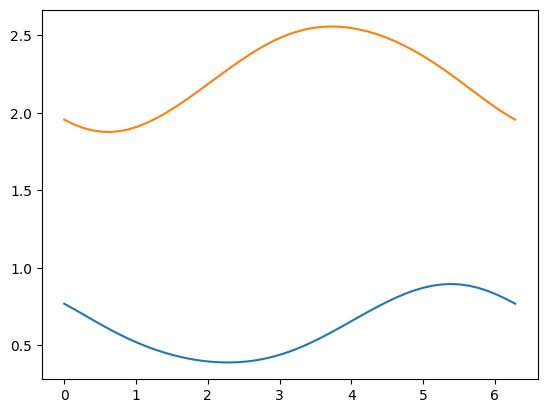

In [41]:
x = [ m[0] for m in t3t4 ]
y = [ m[1] for m in t3t4 ]
plt.plot(theta2s,x)
plt.plot(theta2s,y)

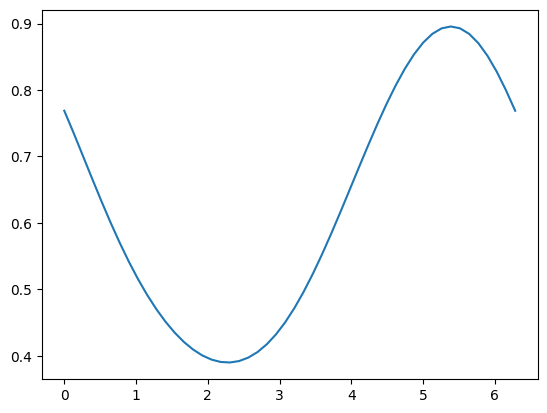

In [42]:
plt.plot(theta2s,x)

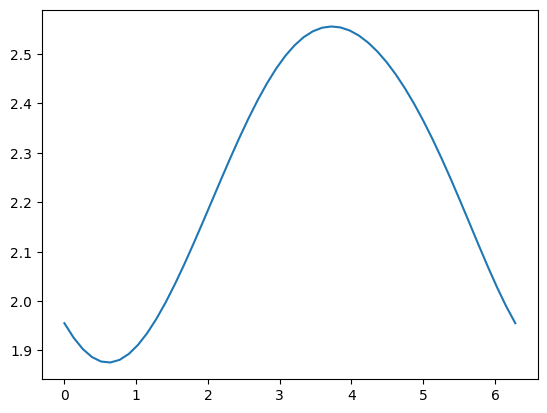

In [43]:
plt.plot(theta2s,y)

In [44]:
theta2s[5]

0.6411413578754679

In [45]:
t2 = theta2s[5]
t3 = t3t4[5][0]
t4 = t3t4[5][1]

In [46]:
t2 = theta2s[5]
t3 = t3t4[5][0]
t4 = t3t4[5][1]
xA = sy.re(rho2*sy.exp(sy.I*theta2)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})
yA = sy.im(rho2*sy.exp(sy.I*theta2)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})
xB = sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})
yB = sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})

In [47]:
xA

1.60282724373591

In [48]:
yA

1.19622106098243

In [49]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [50]:
fig = plt.figure()
fig.add_artist(lines.Line2D([0., 0.], [xA, yA]))
fig.add_artist(lines.Line2D([xA, yA], [xB, yB]))
plt.show()

<Figure size 640x480 with 0 Axes>

In [51]:
k=40
t2 = theta2s[k]
t3 = t3t4[k][0]
t4 = t3t4[k][1]
xA = sy.re(rho2*sy.exp(sy.I*theta2)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})
yA = sy.im(rho2*sy.exp(sy.I*theta2)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})
xB = sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})
yB = sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
        theta2:t2,
        theta3:t3,
        theta4:t4,
        rho1:10.0,
        rho2:2.0,
        rho3:8.0,
        rho4:6.0,})

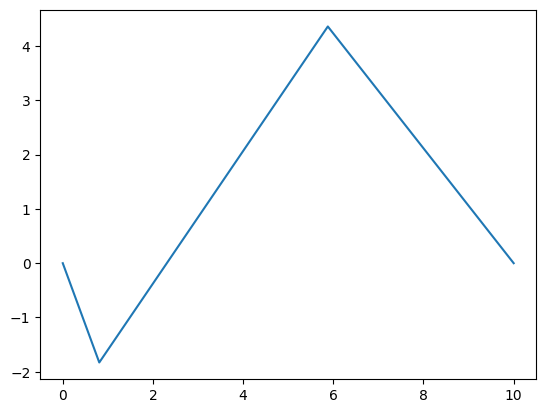

In [52]:
x = [0.,xA,xB,10.]
y = [0.,yA,yB,0.]
plt.plot(x,y)

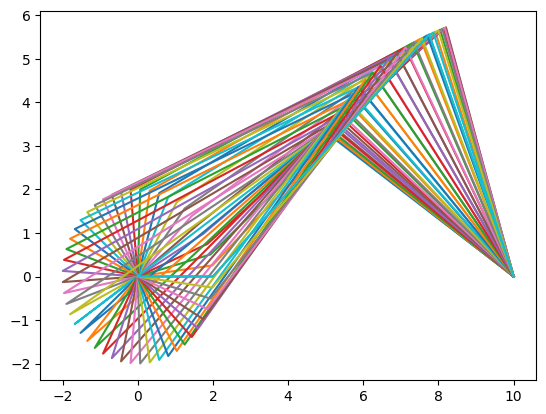

In [53]:
for k in range(50):
    t2 = theta2s[k]
    t3 = t3t4[k][0]
    t4 = t3t4[k][1]
    xA = sy.re(rho2*sy.exp(sy.I*theta2)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    yA = sy.im(rho2*sy.exp(sy.I*theta2)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    xB = sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    yB = sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    x = [0.,xA,xB,10.]
    y = [0.,yA,yB,0.]
    plt.plot(x,y)

In [54]:
t3 = [ t[0] for t in t3t4 ]
t4 = [ t[1] for t in t3t4 ]

In [55]:
min(t3)

0.3898

In [56]:
theta2s[t3.index(min(t3))]

2.3081088883516845

In [57]:
max(t3)

0.8957

In [58]:
theta2s[t3.index(max(t3))]

5.385587406153931

In [59]:
min(t4)

1.876

In [60]:
theta2s[t4.index(min(t4))]

0.6411413578754679

In [61]:
max(t4)

2.556

In [62]:
theta2s[t4.index(max(t4))]

3.7186198756777142

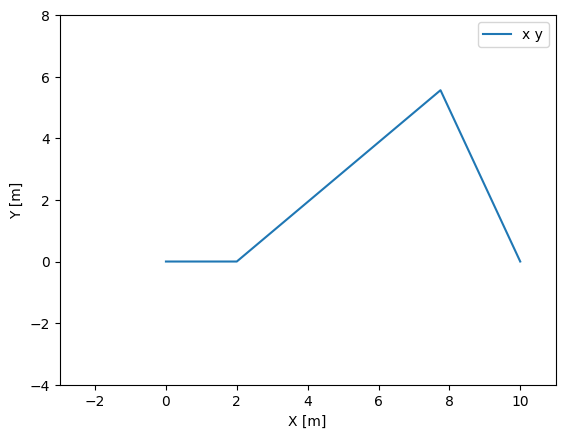

In [80]:
##
## Matplotlib Simpler Example
##

# Simplified from 

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

number_of_frames = 50

x, y = [], []
for k in range(number_of_frames):
    t2 = theta2s[k]
    t3 = t3t4[k][0]
    t4 = t3t4[k][1]
    xA = sy.re(rho2*sy.exp(sy.I*theta2)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    yA = sy.im(rho2*sy.exp(sy.I*theta2)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    xB = sy.re(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    yB = sy.im(rho2*sy.exp(sy.I*theta2)+rho3*sy.exp(sy.I*theta3)).subs({
            theta2:t2,
            theta3:t3,
            theta4:t4,
            rho1:10.0,
            rho2:2.0,
            rho3:8.0,
            rho4:6.0,})
    x.append([0.,xA,xB,10.])
    y.append([0.,yA,yB,0.])

fig, ax = plt.subplots()
line2 = ax.plot(x[0], y[0], label=f'x y')[0]
ax.set(xlim=[-3, 11], ylim=[-4, 8], xlabel='X [m]', ylabel='Y [m]')
ax.legend()

def update(frame):
    # update the line plot:
    
    line2.set_xdata(x[frame])
    line2.set_ydata(y[frame])
    return line2


ani = animation.FuncAnimation(fig=fig, func=update, frames=number_of_frames, interval=30)
ani.save('four_bar_linkage_animation.gif')
plt.show()